In [1]:
#Import libraries 
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# unemployment rate data path
unrate_path = r"C:\Users\richa\Documents\Ex_6\02 Data\Original data\UNRATE.csv"


In [3]:
#load csv
df = pd.read_csv(unrate_path)

In [4]:
# Convert the date column to datetime
df['observation_date'] = pd.to_datetime(df['observation_date'])

In [5]:
# Set as index
df.set_index('observation_date', inplace=True)

In [6]:
df.head()

,UNRATE
observation_date,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


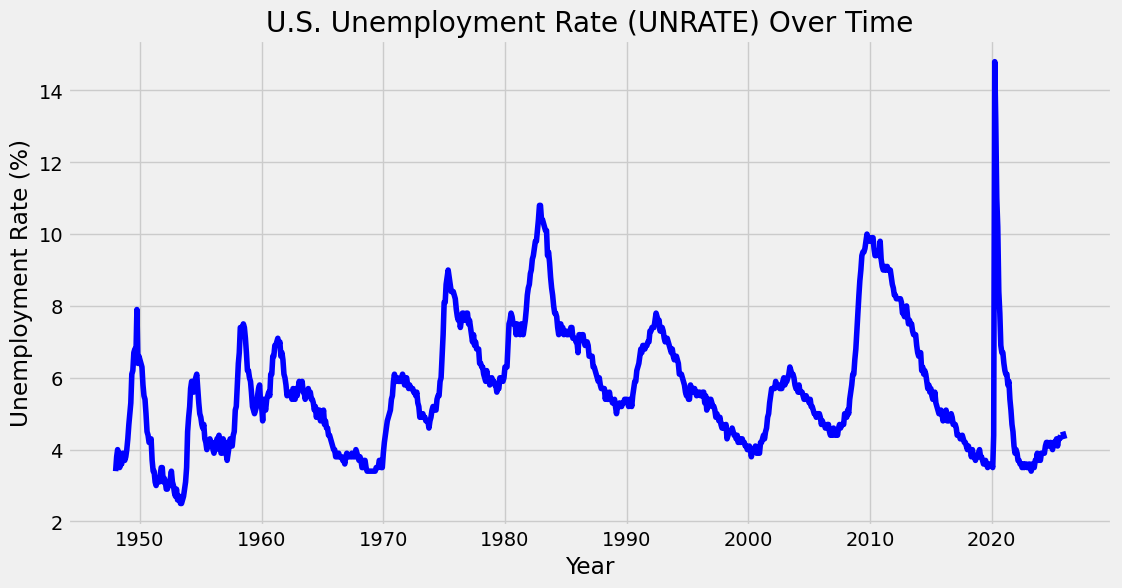

In [8]:
# plot time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['UNRATE'], color='blue')
plt.title("U.S. Unemployment Rate (UNRATE) Over Time")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()

In [ ]:
# unemployment percentage was peak during 2019 and 2020 (covid season)

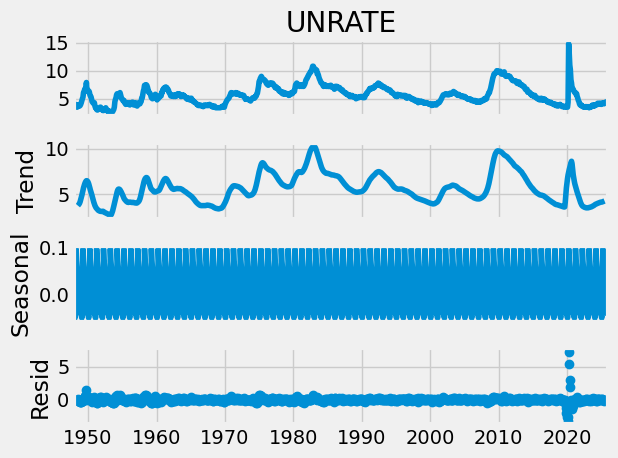

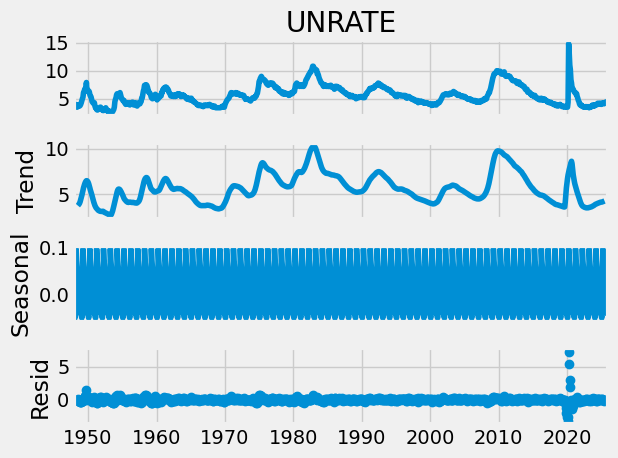

In [11]:
# missing values - interpolation 
df_clean = df['UNRATE'].interpolate()

# Decomposition
decomp = seasonal_decompose(df_clean, model='additive', period=12)
decomp.plot()

In [13]:
#Dickey-Fuller test 
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_clean)

print("ADF Statistic:", adf_result[0])
print("p‑value:", adf_result[1])
print("Critical Values:", adf_result[4])

ADF Statistic: -3.9377315076176895
p‑value: 0.0017740604125911432
Critical Values: {'1%': np.float64(-3.437363201927513), '5%': np.float64(-2.864636122077874), '10%': np.float64(-2.5684185607252137)}


In [ ]:
# ADF is smaller than the critical value which rejects null hypothesis. 
# pvalue is les than 0.05 which shows significance statistically
# time series is stationary